# 1) Imports

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from os import walk
from os.path import join, exists

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.efficientnet import (
	EfficientNetB0, EfficientNetB1,
	EfficientNetB2, EfficientNetB3,
	EfficientNetB4, EfficientNetB5,
	EfficientNetB6, EfficientNetB7
)

import tensorflow
from tensorflow.keras.preprocessing import image

# 2) Carregar dataset

In [4]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image
4486,case129_day22_slice_0056,small_bowel,None,.\train\case129\case129_day22\scans\slice_0056...
117,case123_day20_slice_0040,large_bowel,None,.\train\case123\case123_day20\scans\slice_0040...
6385,case139_day18_slice_0113,small_bowel,None,.\train\case139\case139_day18\scans\slice_0113...
8831,case130_day22_slice_0064,stomach,25745 10 26009 15 26273 18 26538 20 26803 23 2...,.\train\case130\case130_day22\scans\slice_0064...
92813,case138_day0_slice_0010,stomach,None,.\train\case138\case138_day0\scans\slice_0010_...
...,...,...,...,...
18976,case142_day16_slice_0054,small_bowel,None,.\train\case142\case142_day16\scans\slice_0054...
60575,case22_day0_slice_0064,stomach,None,.\train\case22\case22_day0\scans\slice_0064_26...
1729,case77_day0_slice_0001,small_bowel,None,.\train\case77\case77_day0\scans\slice_0001_26...
35373,case113_day19_slice_0016,large_bowel,None,.\train\case113\case113_day19\scans\slice_0016...


# 3) Clusterizar imagens p/ gerar exemplos de teste

In [278]:
distancia_vizinho = 1
n_vizinhos = 1

def new_dbscan():
	return DBSCAN(
		eps=distancia_vizinho,
		min_samples=n_vizinhos,
		n_jobs=-1
	)

In [279]:
largura, altura = 150, 150

def clustering(img_path):
    img = image.load_img(
        img_path,
        target_size=(largura, altura),
        color_mode='grayscale'
    )

    # Para realizar o clustering de uma imagem
    # Precisa de uma matriz das posicoes + uma dimensao para cores
    image_as_arr = image.img_to_array(img).reshape(largura * altura, 1)
    
    dbscan = new_dbscan()
    dbscan.fit(image_as_arr)

    return dbscan.labels_

In [280]:
df_dados = pd.DataFrame(dataset).sample(50)
# df_dados = pd.DataFrame(dataset)
df_dados['clusters'] = df_dados['image'].apply(clustering)
df_dados.head()

KeyboardInterrupt: 

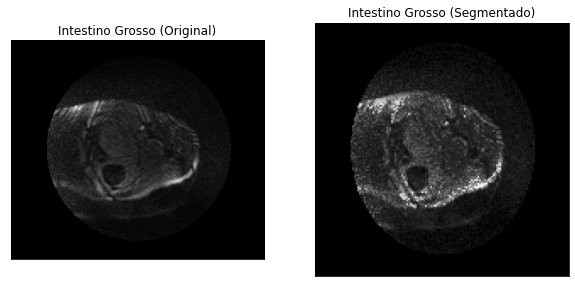

In [277]:
linha = df_dados.sample(frac=1).iloc[0]

fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

nomes = {
	'stomach': 'Estômago',
	'large_bowel': 'Intestino Grosso',
	'small_bowel': 'Intestino Delgado',
}

ax = plt.subplot(1, 2, 1)
ax.imshow(plt.imread(linha['image']), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Original)')

ax = plt.subplot(1, 2, 2)
ax.imshow(linha['clusters'].reshape(largura, altura), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(nomes[linha['class']] + ' (Segmentado)')
plt.show()

In [ ]:
# Aplicar StandardScaler para normalizar os dados

# scaler = preprocessing.StandardScaler()
# array_features = scaler.fit_transform(array_features)

# Aplicar StandardScaler para normalizar os dados

In [ ]:
df_features = pd.DataFrame(df_dados)

df_features

In [7]:
# df_dados.reset_index().drop(columns=['index']).to_feather('train_com_imagens.feather')